# Results notebook

In [58]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

from src.preprocessing import WikispeediaData
from src.similarity import *
from src.shortest_paths import *
from src.sum_graph import *
from src.hubs_analysis import *
from src.unfinished_games import *
from src.plot_functions import *
from src.pagerankVSfreqeuency import *
from src.fork import *
from src.hubs_frequency import get_hub_positions, plot_hub_positions


# Wikispeedia : Hubs, User Patterns, and what can they say about Common Knowledge

In this notebook, we present the results of our data analysis. The data story is available here:

The goal of this analysis is to identify hubs and explore user navigation patterns within the Wikispeedia game. Specifically, we try to understand whether these patterns can offer insights into common knowledge. 

By analyzing the characteristics and usage of hubs, commonly used and abandoned paths, and more, we provide insights into... 

We begin with analysing and introducting the wikipedia version in the wikispeedia game. Then we analyse characteristics of hubs, give articles a continuous hub score based by implementing a page rank algorithm. We analyse the amount of hubness for different categories of articles such as Science and Geography.

In [2]:
#Creating data object, dictionary of dataframes
data = WikispeediaData()

In [60]:
#Setting theme for plots
sns.set_theme() 

## Wikispedia in the Wikispeedia game

We begin with exploring the version of Wikipedia in the Wikispeedia game.

In [4]:
print('Number of articles in Wikispeedia version of Wikipedia', len(data.articles))

Number of articles in Wikispeedia version of Wikipedia 4604


In [5]:
print('Maximum shortest path between one article to another:', max(map(np.nanmax, data.matrix)))

Maximum shortest path between one article to another: 9.0


From this data we can see that the version of Wikipedia in Wikispeedia containts 4604 articles and if it is possible to navigate from one article to another the target article is maximum 9 clicks away. That means from one article to any other which it is possible to navigate to 9 is the maximum number of clicks you might have to do to reach the target article. Now let's analyse the distribution of categories! 

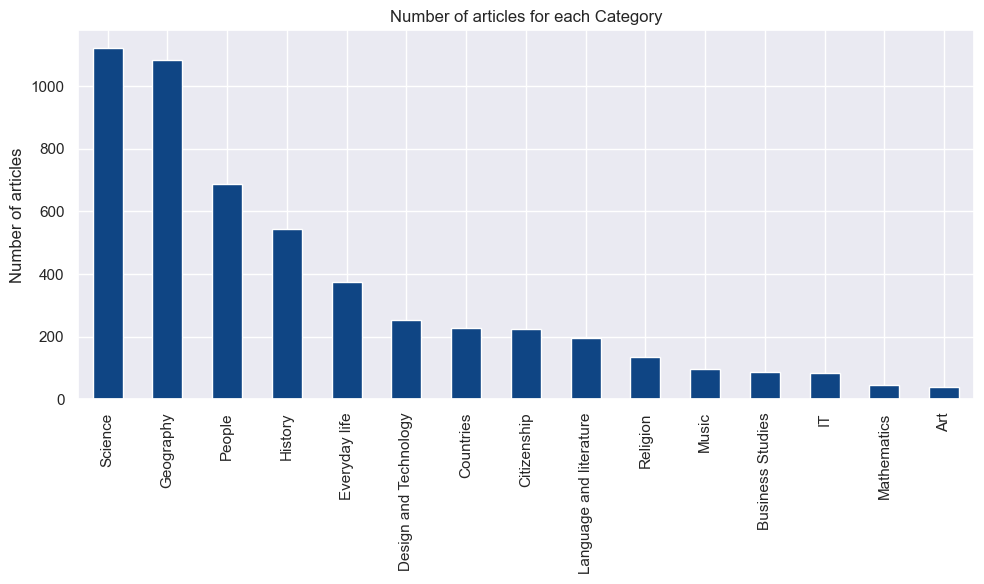

In [6]:
plot_category_distribution(data.categories['1st cat'], 'Number of articles for each Category')

The figure above shows the distributions of categories on Wikipedia. Note that each article is categoriesed as belonging to one or more topics. The category of an article is not neccesarily unique as one article can belong to several topics for example Wood which belongs to both the Science and Design and Technology, see results below. We can see that the most common categories of articles are Science and Geography.

In [7]:
print('Categories for article Wood:')
print(data.categories['1st cat'].loc[data.categories['article_name']=='Wood'].values)

Categories for article Wood:
['Design and Technology' 'Science']


## Analysis of characteristics of hubs
For this part we do an initial analysis of the articles on wikipedia to try and get a better understanding of them and which articles are potentially hubs, by looking at the characteristics of a hubs. A hub is a link that is well connected in the Wikipedia network and can be used to navigate to many other articles. The characteristics used are number of links from the article (source count), number of links to the article (target count), the mean shortest path from the article to other articles and finally the mean shortest path to the article from other articles. 

The characteristics of the hubs is loaded into a dataframe and it also contains the category of each hub, since one article can belong to one or more articles each category has one column and the article has a value of 1 for that column if it belongs to that category.

In [8]:
# Getting dataframe with data of hub characteristics from hubs_analysis.py
# For all articles: target count, source count, mean shortest path to/from the article to any article in the network and their category(ies)
df_hubs = get_hubs_dataframe(data)

In [9]:
df_hubs.head()

,article_names,source_counts,target_counts,mean_shortest_path_to_article,mean_shortest_path,Art,Business Studies,Citizenship,Countries,Design and Technology,Everyday life,Geography,History,IT,Language and literature,Mathematics,Music,People,Religion,Science
0,Áedán mac Gabráin,11,0,0.0,3.395464,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,Åland,19,0,0.0,3.127959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,Édouard Manet,20,0,0.0,3.171598,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Éire,8,0,0.0,3.325937,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,Óengus I of the Picts,10,0,0.0,3.386834,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [10]:
#Printing statistics for dataframe
df_hubs[['source_counts', 'target_counts','mean_shortest_path_to_article','mean_shortest_path']].describe()

,source_counts,target_counts,mean_shortest_path_to_article,mean_shortest_path
count,4604.000000,4604.000000,4604.000000,4604.000000
mean,26.038662,26.038662,2.829412,3.188769
std,24.201491,62.746827,1.170888,0.321702
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,2.626172,3.025154
50%,19.000000,8.000000,2.989640,3.179408
75%,33.000000,25.000000,3.476390,3.344081
max,294.000000,1551.000000,6.866085,5.119852


From the statistics above we see that wikipidia pages have on average the same amount of articles to and from them, however the median is lower than the mean in both cases indicating a skewed distribution of the number of articles to and from wikipedia pages. Lets look closer at the distributions of these.

**Distribution of source and target count for all articles**

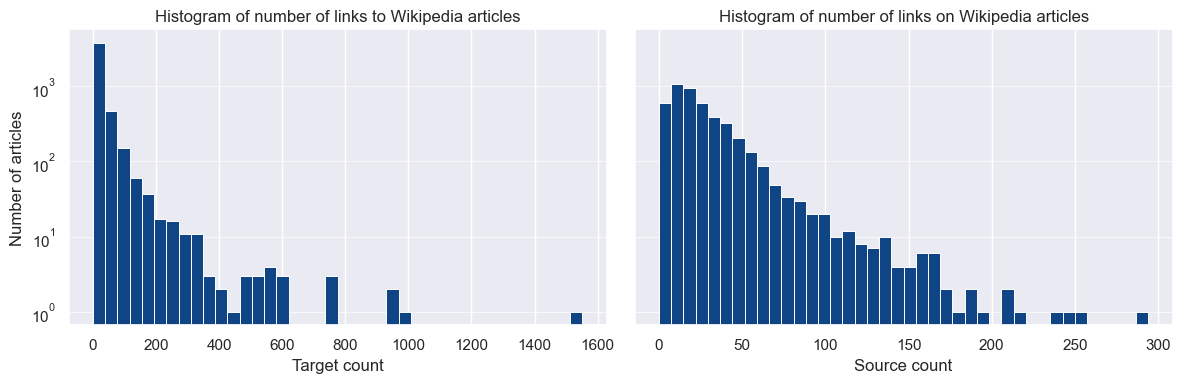

In [11]:
#Calling function to plot distributions from plot_functions.py
plot_two_distributions(df_hubs, "target_counts", "source_counts", 'Histogram of number of links to Wikipedia articles', 
                       'Histogram of number of links on Wikipedia articles','Target count','Number of articles','Source count', 
                       'Number of articles',log_scale = True)

Note that the y-axis of the plot is in log scale. From the distribution of links we can clearly see that there is a variation in the number of links on wikipedia pages and that there are many articles with fewer links to them and some articles have many links to them. 

**Distribution of mean shortest path to and from articles for all articles**

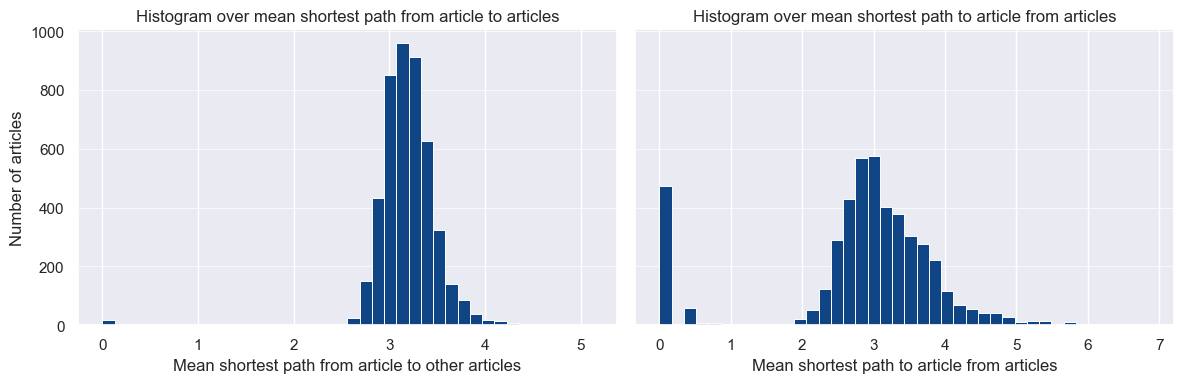

In [12]:
#Calling function to plot distributions from plot_functions.py
plot_two_distributions(df_hubs, "mean_shortest_path", "mean_shortest_path_to_article", 'Histogram over mean shortest path from article to articles', 
                       'Histogram over mean shortest path to article from articles','Mean shortest path from article to other articles',
                       'Number of articles','Mean shortest path to article from articles', 'Number of articles')

In the first plot we see that the distribution of mean shortest path to another article is much more evenly distributed and dense. We can see that there are some articles which are outliers and have a very short mean shortest path. However, this does not mean that they are more connected to other articles in the network since nan mean was used to calculate the mean shortest path. Therefore articles which are not connected to any other article will have a value of 0.

The mean shortest path to a article is less dense and we can see that there are also some outliers. We can see that some articles have the value 0 for mean shortest path to them meaning these articles are in accessible to players unless they start from this article. 

**Looking at extreme values in distributions**

Here we are looking at the extreme values in the distribution to get an understanding of what articles might be hubs. We are looking at the articles which have the most links to and from them. We are also looking at the ones which have a short mean path to any other article. 

In [13]:
#Calling function in hubs_analysis.py
top_10_article_names_source = get_top_10_largest(df_hubs, 'source_counts', 'Articles with most of links from them:', n = 10)

Articles with most of links from them:
                                  article_names  source_counts
4297                              United States            294
1247               Driving on the left or right            255
2504                          List of countries            244
2503             List of circulating currencies            236
2515                   List of sovereign states            216
128                                      Africa            212
2505  List of countries by system of government            207
2433                                    Lebanon            192
2134                                   Interpol            191
340                                     Armenia            186


In [14]:
#Calling function in hubs_analysis.py
top_10_article_names_target = get_top_10_largest(df_hubs, 'target_counts', 'Articles with most of links to them:', n = 10)

Articles with most of links to them:
         article_names  target_counts
4297     United States           1551
4293    United Kingdom            972
1568            France            959
1433            Europe            933
1385           England            751
4542      World War II            751
1694           Germany            743
2098             India            611
1389  English language            598
2538            London            587


When calculating the mean shortest path to and from an article nan mean was used meaning that if an article is not connected to any other article or very few articles the mean shortest path will be very low. Therefore, these cases are filtered out and will not be considered as having a short path.

In [15]:
min_indices = df_hubs[df_hubs["mean_shortest_path"] < 1].index
print('Number of articles with min distance smaller than one:', len(df_hubs["article_names"].iloc[min_indices]))

Number of articles with min distance smaller than one: 19


In [16]:
#Creating filtered hubs dataframe without articles that are outside of the main wikipedia network
df_hubs_filtered = df_hubs.drop(min_indices).reset_index(drop=True).copy()

#Calling function in hubs_analysis.py
top_10_article_names_shortest_path = get_top_10_smallest(df_hubs_filtered, 'mean_shortest_path', 
                                           'Articles with mean shortest path to other articles after filtering out articles not in the main network:')

Articles with mean shortest path to other articles after filtering out articles not in the main network:
                     article_names  mean_shortest_path
4281                 United States            2.484834
39                    21st century            2.563502
1982          History of the world            2.578792
331                      Argentina            2.586436
24                    19th century            2.596054
4277                United Kingdom            2.606165
1242  Driving on the left or right            2.609467
128                         Africa            2.622935
3951                      Swastika            2.626387
1687                       Germany            2.626880


Similarly, for the mean shortest path to a given article, some articles have very low values, including zero, indicating that they are unreachable to players or mostly unreachable. These articles are filtered out before identifying the top articles with the shortest paths to them, ensuring that the analysis focuses on articles that are more accessible within the Wikipedia network.

In [17]:
#Filtering out inaccesable articles and printing the number of inaccessible articles
min_indices_to = df_hubs_filtered[df_hubs_filtered["mean_shortest_path_to_article"] <= 1].index
print('Number of articles with min distance to:', len(df_hubs_filtered["article_names"].iloc[min_indices_to]))

Number of articles with min distance to: 534


We see that quite a lot of articles are not accessible in the network.

In [18]:
#Printing top 10 articles with shortest path to them
df_hubs_filtered = df_hubs_filtered.drop(min_indices_to)

#Calling function in hubs_analysis.py
top_10_article_names_shortest_path_to  = get_top_10_smallest(df_hubs_filtered, 'mean_shortest_path_to_article', 'Articles with mean shortest path to them from other articles:')

Articles with mean shortest path to them from other articles:
         article_names  mean_shortest_path_to_article
4281     United States                       1.690949
1427            Europe                       1.839258
4277    United Kingdom                       1.843621
1562            France                       1.849291
1687           Germany                       1.904035
4524      World War II                       1.907088
2409             Latin                       1.944166
1383  English language                       1.945038
2091             India                       1.945038
1379           England                       1.951145


#### How many articles are in the top 10?

In [19]:
common_articles_set = top_10_article_names_source & top_10_article_names_target & top_10_article_names_shortest_path & top_10_article_names_shortest_path_to

# Print the common article names
print("Articles present in all three:")
print(common_articles_set)

Articles present in all three:
{'United States'}


We see that only one article is in the top 10 of all the used characteristics of a hub and that article is United States. In order to create a continuous metric for the interconnectedness of an article or the ''hubness'' of an article PageRank was used.

### PageRank
The PageRank algorithm gives a continuous measure from 0 to 1 of how important an article is in the network by looking at the number of links to that article and the quality of the link. The "quality" of the link refers to how many incoming edges that node (article) has. Therefore, PageRank is an iterative algorithm to rank nodes in a graph network.

However, the traditional PageRank algorithm highly prioritizes incoming edges to a node, with little consideration given to number of outgoing edges. For our purposes, we need to consider both target and source count, to understand articles that are truly cornerstones within the Wikispeedia game. We therefore adjusted the PageRank algorithm to give equal weighting to nodes with a high number of incoming edges and nodes with a higher number of outoing edges.

In [20]:
# call PageRank functions from hubs_analysis.py
df_hubs = calculate_pagerank(data, df_hubs)
df_hubs,G = calculate_outgoing_pagerank(data, df_hubs)
df_hubs, df_filtered_hubs = create_hub_score(df_hubs)

The calculate PageRank function implements the traditional pagerank algorithm on our graph network of articles. It returns the data frame with a new column PageRank score. 

The calculate_outing_paegrank implements the PageRank algorithm with the weights adjusted to give higher value to articles with lots of outgoing links. It returns the df with a new column Outgoing_PageRank score.

The create_hub_score takes the average of these two previous pagerank scores and creates a new column hub_score in df_hubs. Df_filtered_hubs also has this score, but has rows removed with articles with no incoming links. These are filtered out as our later analysis is limited to clicks and actions taken by the user and the only way to access an article without any link to them is to start in this article. Additionally, for our purposes we will mainly use the hub_score as we see it as important to both be able to access an article and navigate from it. 

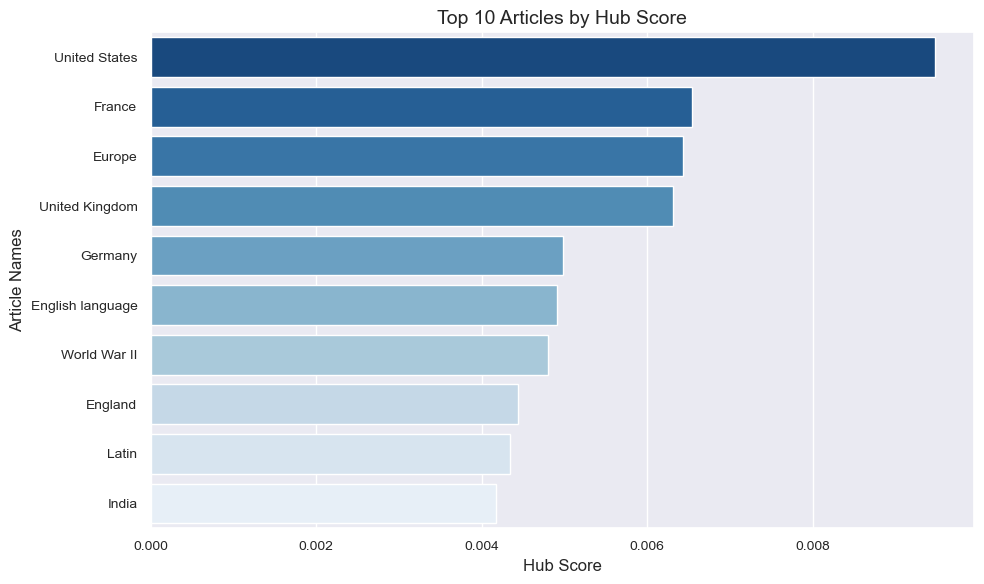

In [21]:
# Top 10 hubs visualization, calling function from plot_functions.py
plot_top10_pagerank(df_hubs)

PageRank values represent the probability that a random internet surfer will land on that node/page. So the sum of the pagerank value for all the nodes is 1. As expected from the previous analysis the article with the top PageRank score is United States. 

### Looking at correlation between the characteristics and the PageRank score
As another sanity check we want to look at the correlation between the continuous measure of the hubness of the article with the other iidentified characteristics of a hub.

In [22]:
cols = ['source_counts','target_counts','mean_shortest_path_to_article','mean_shortest_path', 'hub_score']
p_values , _ = calculate_correlation(df_filtered_hubs, cols)
print('P-values for the bottom row of the correlation matrix')
print(np.round(p_values[-1, :], 2))

P-values for the bottom row of the correlation matrix
[0. 0. 0. 0. 0.]


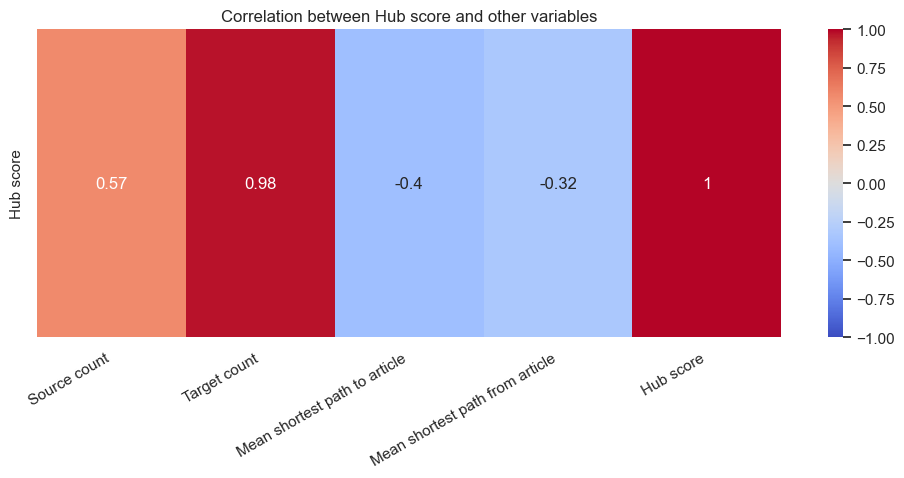

In [23]:
#Plotting correlation matrix from plot_functions.py
get_correlation_matrix_row(df_filtered_hubs, cols)

Highly correlated with target counts, and also correlated with source counts. The metric is also negatively correlated with mean shortest path and mean shortest path to article, which means that the higher the hub score the shorter the path to other articles and the shorter the path to the article. Since all p-values are significant it means that there is a correlation between the hub score metric created and the other characteristics of the hubs. Which is what we want!

#### Analysing the hub score and categories
Now we are going to look at the categories of the articles and what their page rank score is. This will be done by first looking at the total page rank score for each category. 

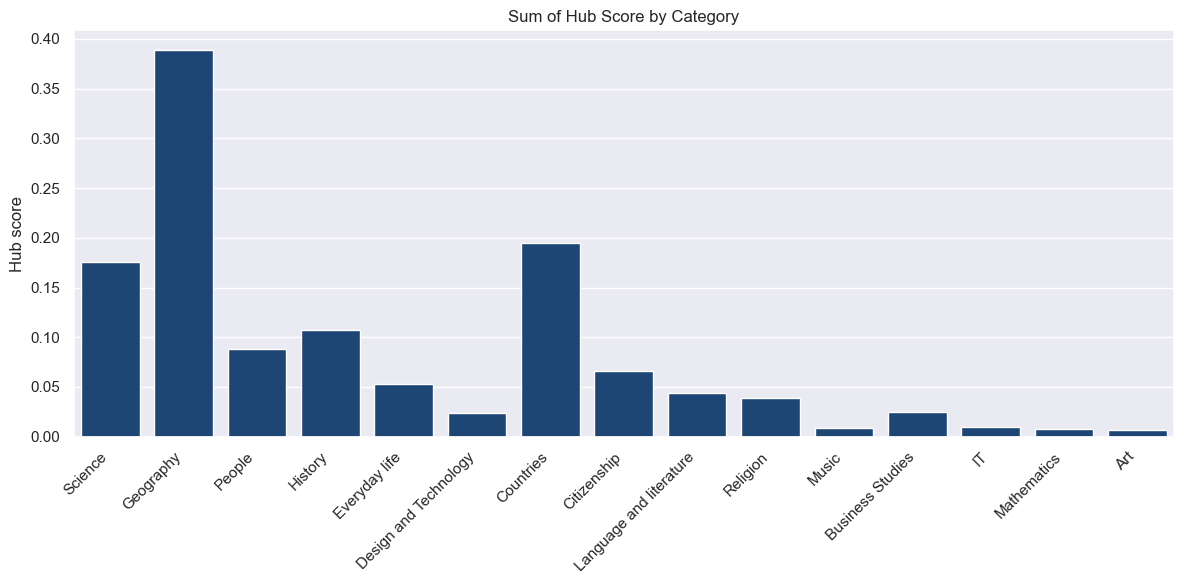

In [24]:
barplot_page_score_by_category(df_filtered_hubs)

The plot is plotted in the order of the number of articles in each category. Interestingly, we can see that the category with the highest page rank score is Geography then Countries followed by Science. This is interesting as this is different from the number of articles in each of these categories. To get a better understanding of the hubscore we now normalize the score by the number of articles in each category.

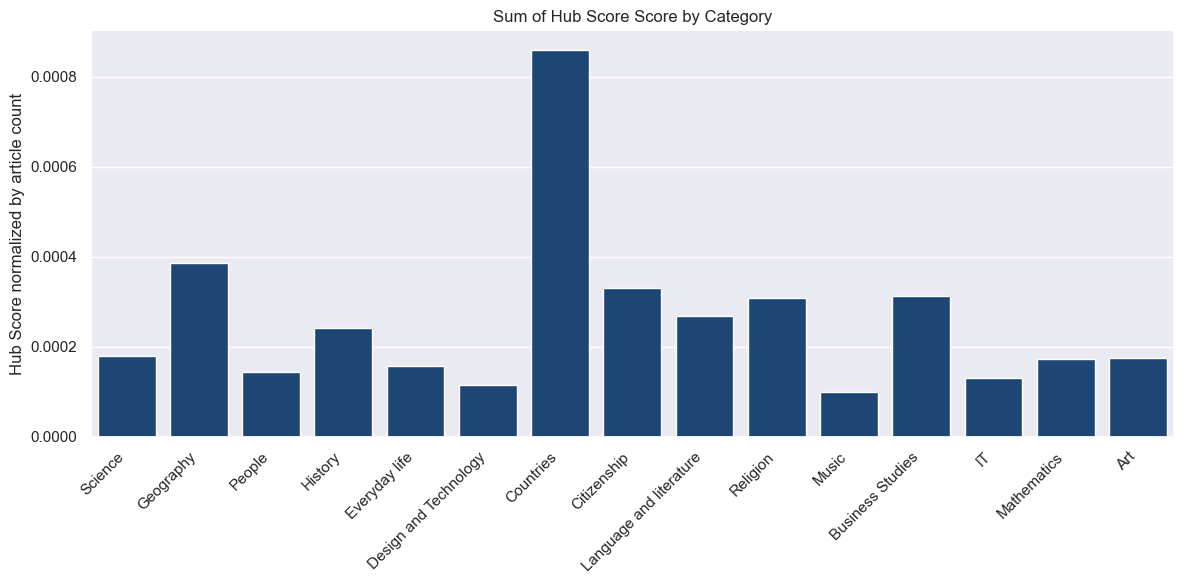

In [25]:
normalized_hubscore_category = barplot_page_score_by_category_normalized(df_filtered_hubs)

In [26]:
#Printing average hubscore for each category
sorted_normalized_hubscore_row = normalized_hubscore_category.loc["Hub score"].sort_values(ascending=False)
print(sorted_normalized_hubscore_row)

Countries                  0.000860
Geography                  0.000387
Citizenship                0.000329
Business Studies           0.000313
Religion                   0.000309
Language and literature    0.000268
History                    0.000241
Science                    0.000179
Art                        0.000174
Mathematics                0.000172
Everyday life              0.000157
People                     0.000145
IT                         0.000130
Design and Technology      0.000115
Music                      0.000099
Name: Hub score, dtype: float64


From looking at the average hubscore we can see that countries has a high value, which makes sense as of the top 10 articles with the highest hubscore countries make up 5 of these indicating that other countries might have high values as well.

In [ ]:
# Visualize all articles in 3d space, with size based on hub score

# Generate positions for articles in 3D space using a random distribution
num_nodes = len(G.nodes())
x_vals = np.random.uniform(-0.2, 0.2, num_nodes)  # size of space
y_vals = np.random.uniform(-0.2, 0.2, num_nodes)  
z_vals = np.random.uniform(-0.2, 0.2, num_nodes)  

# Get PageRank scores and normalize them for point sizes
pagerank_scores = df_hubs.set_index("article_names")["hub_score"].to_dict()
sizes = [pagerank_scores.get(node, 0) * 3000 for node in G.nodes()] 
colors = [pagerank_scores.get(node, 0) for node in G.nodes()]  

# Create a static 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    x_vals, y_vals, z_vals, 
    c=colors, 
    s=sizes, 
    cmap='viridis', 
    alpha=0.8
)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('PageRank Score')

# Set plot titles and remove axes
ax.set_title('Static 3D Visualization of Articles by PageRank')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Show plot
plt.tight_layout()
plt.show()


We are now going to move on from the hubs for a little bit and look at navigation patterns of players.

## Analysis of the similarity between games

To identify a "common knowledge" shared among the players of the game, we must demonstrate that players exhibit similar behavior during their games. To achieve this, we need to examine how different players approach the same game (with the same starting point and target) and assess the degree of similarity in the path they take to navigate. To do so we will look at the finished paths of the players and compare them to each other for same games.

In [27]:
games = get_games(data)
print("Number of games: ", len(games))
print("Number of games with more than 10 participants: ", games[games["nb_games"] > 10].shape[0])
games.sort_values("nb_games", ascending=False).head(10)

100%|██████████| 51318/51318 [01:53<00:00, 451.90it/s]

Number of games:  28718
Number of games with more than 10 participants:  126


,start,end,nb_games
5526,Asteroid,Viking,1043
6158,Brain,Telephone,1040
27239,Theatre,Zebra,905
9219,Pyramid,Bean,642
466,Batman,Wood,148
537,Bird,Great white shark,138
464,Batman,The Holocaust,119
536,Bird,Adolf Hitler,107
507,Beer,Sun,99
484,Batman,Banana,69


We can see that among the finished paths of the players, there are many games but only a few of them have more than 10 players. To gain a clearer understanding of the similarity between players, we will focus on these games with larger player participation.

A first idea is to create a **distance between two paths** in the wiki-graph. If two players, playing the same game, have similar paths (i.e., a short distance between their paths), we can assume that they behave similarly. Conversely, if the paths are different (i.e., a long distance between them), we can infer that the players' behaviors differ.

There are various ways to measure the similarity between two paths, we decided to implement two distances that give different insights on the data :
- **Jacard distance** : the number of common nodes divided by the number of nodes in the union of the two paths
- **Shortest Path-based Distance (SP)**: $$d(p_1,p_2)= \max_i (\min_j SP(p_1[i],p_2[j]))$$ where $p_1$ and $p_2$ are the two paths to compare and $SP(p_1[i],p_2[j])$ is the length of the shortest path from $p_1[i]$ to $p_2[j]$. Note that this distance is not symmetric, but we can make it symmetric by taking the maximum distance of the two directions. This distance can be interpreted as the maximum number of clicks separating the two paths at any point during the navigation.

We can analyse the similarity between paths taken by players for each game with more than 10 players we have. Here we present the results for one game starting from "Calculus" and ending at "Paul McCartney".

100%|██████████| 39/39 [00:00<00:00, 197796.68it/s]


Game from  Calculus  to  Paul McCartney


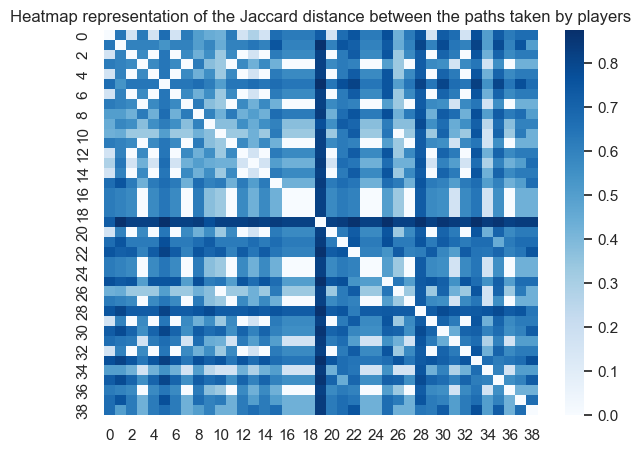

Mean distance for game from  Calculus  to  Paul McCartney  :  0.5025753980070026


100%|██████████| 39/39 [00:00<00:00, 171.40it/s]


Game from  Calculus  to  Paul McCartney


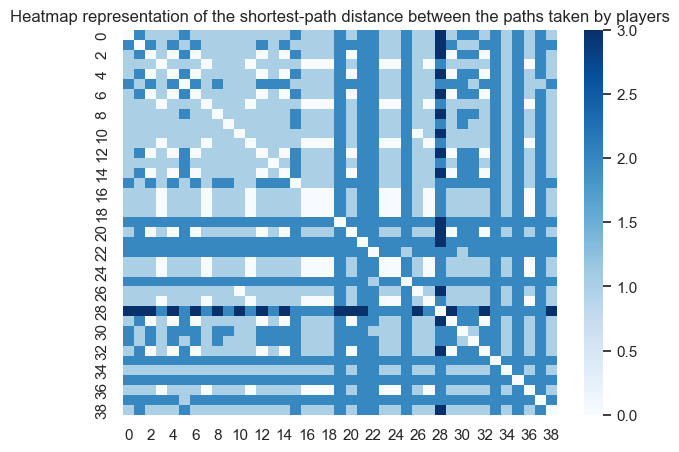

Mean distance for game from  Calculus  to  Paul McCartney  :  1.3372781065088757


In [28]:
start = "Calculus"
end = "Paul McCartney"

plot_sim_matrices(data,[start],[end],distance = distance_Jaccard, title = "Heatmap representation of the Jaccard distance between the paths taken by players")
plot_sim_matrices(data,[start],[end],distance = distance_matrix, title = "Heatmap representation of the shortest-path distance between the paths taken by players")

For the game "Calculus" to "Paul McCartney", the results can be interpreted as follows :
- The average Jacard distance between two paths is 0.5. This means that on average,  two players share 50% of the articles they pass through.
- The average shortest path distance is 1.3. This means that on average, two players are at most 1.3 clicks away from each other during this game. 

These results give us a good indication of how similarly the players behave. From this, we can infer that they tend to take similar paths, likely due to shared knowledge or common strategies.

Another approach is to analyze the **similarity between the first clicked articles of two players**. For this analysis, we focus on a game with more than 10 players, specifically examining the similarity between the first articles each player visits. While we will continue analyzing the game from "Calculus" to "Paul McCartney" in this case, this approach can be applied to any game with a sufficient number of players.

This analysis can provide valuable insight into whether players' initial approach to the game and their understanding of the target article are similar or not.

To measure this similarity, we compute the mean distance between the first articles clicked by two players, using the shortest path distance.



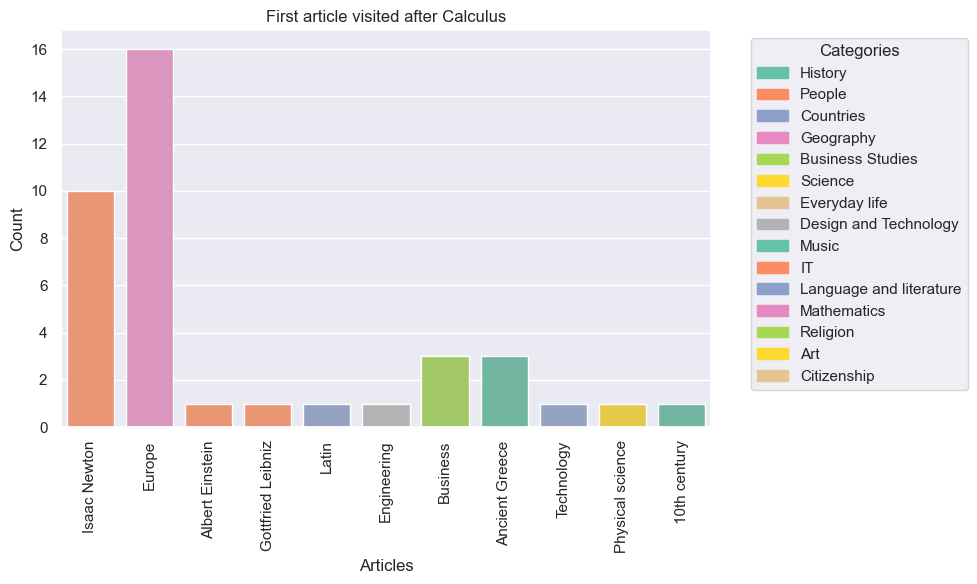

The mean distance between two first articles visited after Calculus by different players is:  1.1443994601889338


In [29]:
start = "Calculus"
end = "Paul McCartney"
plot_first_article_bar_chart(data,start, end)
print("The mean distance between two first articles visited after Calculus by different players is: ", distance_first_article(data, start, end))

These results can be interpreted as follows:

- The vast majority of players tend to click on either "Europe" or "Isaac Newton" as their first article, indicating that most players behave similarly.

- There is also a noticeable similarity in the categories of the first articles clicked by players. For example, most players start by clicking on articles related to "People" or "Geography."

- The average distance between the first articles clicked by two players is 1.5, suggesting that the first clicked articles are often quite close to each other. For instance, "Isaac Newton," "Physical Science," and "Albert Einstein" are examples of closely related first articles.


We can then compute this average distance for all games with more than 10 players (and fewer than 100 players to manage computational complexity) and analyze the results.

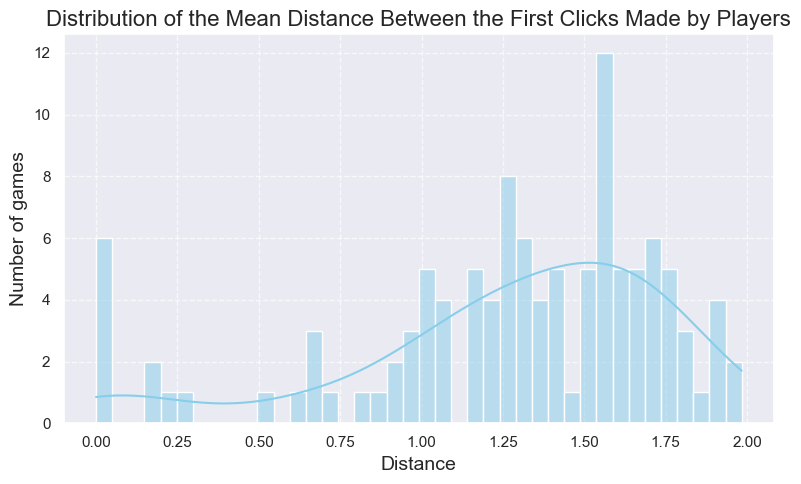

In [30]:
games_valid = games[(games["nb_games"] > 10)& (games["nb_games"] < 100)].copy()
games_valid["dist_first_article"] = games_valid.apply(
    lambda x: distance_first_article(data, x["start"], x["end"]), axis=1
)
plt.figure(figsize=(8, 5))
sns.histplot(games_valid["dist_first_article"], bins=40, kde=True, color="skyblue")

plt.title("Distribution of the Mean Distance Between the First Clicks Made by Players", fontsize=16)
plt.xlabel("Distance", fontsize=14)
plt.ylabel("Number of games", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We see that on average for all games , the average distance between the first articles clicked by two players is  around 1.5. This indicates that players tend to start their games with similar articles, likely due to shared knowledge or common strategies.

## Analysis of unfinished games

To understand and analyze the common knowledge shared by players, it is important to have a look at the unfinished games. These games offer valuable insights into players' behaviors, particularly in identifying areas where they tend to lack knowledge.

We can first have a look at the most common unfinished games :

In [31]:
games_unfinished = get_games_unfinished(data)
games_unfinished.sort_values("nb_games",ascending =False).head()

100%|██████████| 24875/24875 [00:35<00:00, 702.16it/s]


,start,target,nb_games
1578,Brain,Telephone,1004
1580,Pyramid,Bean,944
1577,Theatre,Zebra,872
1594,Asteroid,Viking,727
6772,Batman,Wood,75


We can identify some of these games that also appear among the most frequently completed games. For example, the game "Brain to Telephone" was finished 1,040 times and abandoned 1,004 times. This presents an interesting opportunity to calculate a success rate for each game, which can provide a better measure of the difficulty of a game.

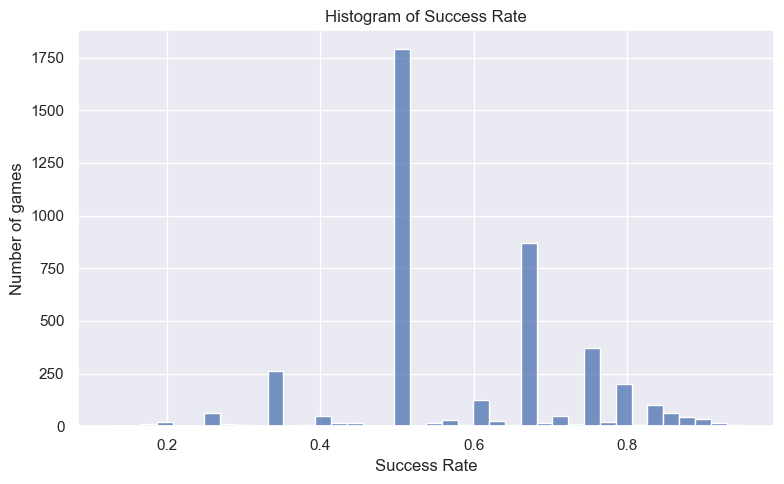

In [32]:
games_unfinished = success_rate(games_unfinished,games)
games_unfinished_filtered = games_unfinished[games_unfinished["success_rate"].notna()]
plt.figure(figsize=(8, 5))
sns.histplot(games_unfinished_filtered["success_rate"], bins=40)

plt.title("Histogram of Success Rate")
plt.xlabel("Success Rate")
plt.ylabel("Number of games")

plt.tight_layout()
plt.show()

We observe that most games have a success rate around 0.5. However, we can see that some games have very high (resp very low) success rates, and it would be interesting to analyze them as they may reveal patterns of common knowledge (or lack ) among players.

Additionally, we want to investigate where the games tend to stop, as this can provide valuable insights into why players abandon the game. Did they encounter a dead-end, or were they unable to identify the next step to take?

In [33]:
abandon = get_abandon_point(data)
abandon.sort_values("nb_games",ascending =False).head()

100%|██████████| 24875/24875 [00:09<00:00, 2579.33it/s]


,abandon_point,nb_games
66,United States,660
97,United Kingdom,299
75,England,285
801,Brain,278
233,Theatre,202


Weirdly, the most frequent stop points appear to be major hubs (e.g., US, UK...), which raises the question of why players tend to stop at these points. To clarify further, we can examine the number of clicks made by a player in an unfinished path, as well as the reason given for abandonment, whether it be a restart or a timeout.

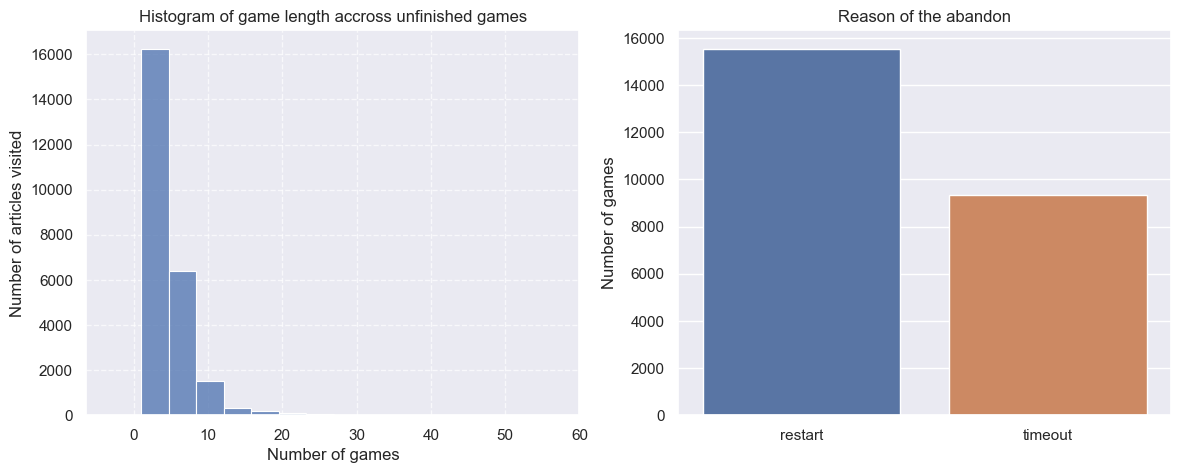

In [34]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data.paths_unfinished["paths"].apply(lambda x: len(x)), bins=40, ax = axes[0])
axes[0].set_xlim(right=60)
axes[0].set_title('Histogram of game length accross unfinished games')
axes[0].set_xlabel('Number of games')
axes[0].set_ylabel('Number of articles visited')
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.barplot(x = data.paths_unfinished["rating"].value_counts().index, y = data.paths_unfinished["rating"].value_counts().values,hue = data.paths_unfinished["rating"].value_counts().index)
axes[1].set_title('Reason of the abandon')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Number of games')

plt.show()

We observe that many games stop at the very beginning, which could indicate that players either don't understand or don't feel confident that they can reach the target point, suggesting a potential lack of knowledge regarding the target or start point. Additionally, we see that most games are abandoned due to a restart, which might suggest that the game is perceived as too difficult by the players, while timeouts may indicate that players attempted the game but were unable to find a solution. 

Depending on the path taken by the players, we could analyze more deeply the reasons for abandonment — whether the game was perceived as impossible (in cases of restart from the beginning), or if players encountered a dead-end for example.

TypeError: success_rate_category() takes 1 positional argument but 2 were given

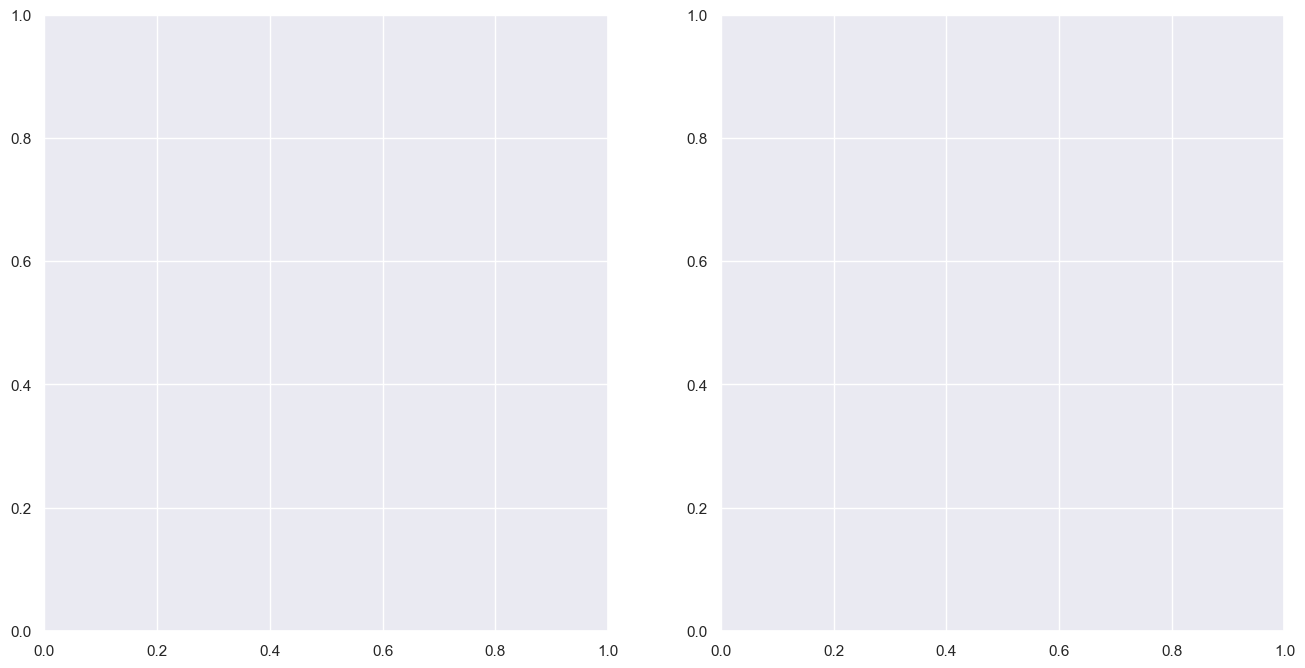

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Success Rate by Category
cat_success_rate = success_rate_category(data, games_unfinished)
sns.barplot(x=cat_success_rate.index, y=cat_success_rate, ax=axes[0])
axes[0].set_title("Success Rate by Category")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Success Rate")
axes[0].tick_params(axis='x', rotation=90)

# Percentage of finished and unfinished games
cat_finished, cat_unfinished = target_category(data, games_unfinished, games)
axes[1].bar(x=cat_finished["category"], height=cat_finished["nb_games"], width=-0.4, align='edge', label="Finished games")
axes[1].bar(x=cat_unfinished["category"], height=cat_unfinished["nb_games"], width=0.4, align='edge', label="Unfinished games")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Percentage of games")
axes[1].set_title("Percentage of finished and unfinished games in each category")
axes[1].tick_params(axis='x', rotation=90)

axes[1].legend()

plt.tight_layout()
plt.show()

These plots show that games with target articles in the "Countries" category exhibit significantly higher success rates compared to those in the "Design and Technology" category. This trend suggests that players may possess greater knowledge or familiarity with countries, resulting in higher completion rates for games in this category. It is important to note, however, that the number of games in the "Countries" category is much lower than that in other categories, such as "Geography." These two visualizations provide a clear overview of game success rates based on the target article's category, while taking into account the number of games in each category.

Additionally, we want to investigate where the games tend to stop, as this can provide valuable insights into why players abandon the game. Did they encounter a dead-end, or were they unable to identify the next step to take?

In [27]:
abandon = get_abandon_point(data)
abandon.sort_values("nb_games",ascending =False).head()

  0%|          | 0/24875 [00:00<?, ?it/s]

100%|██████████| 24875/24875 [00:25<00:00, 986.96it/s] 


,abandon_point,nb_games
66,United States,660
97,United Kingdom,299
75,England,285
801,Brain,278
233,Theatre,202


Weirdly, the most frequent stop points appear to be major hubs (e.g., US, UK...), which raises the question of why players tend to stop at these points. To clarify further, we can examine the number of clicks made by a player in an unfinished path, as well as the reason given for abandonment, whether it be a restart or a timeout.

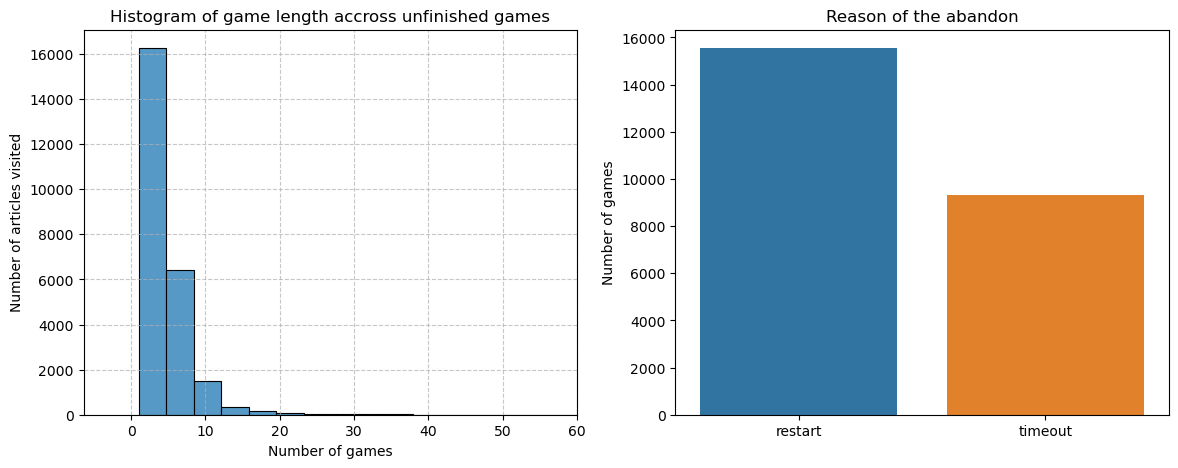

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data.paths_unfinished["paths"].apply(lambda x: len(x)), bins=40, ax = axes[0])
axes[0].set_xlim(right=60)
axes[0].set_title('Histogram of game length accross unfinished games')
axes[0].set_xlabel('Number of games')
axes[0].set_ylabel('Number of articles visited')
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.barplot(x = data.paths_unfinished["rating"].value_counts().index, y = data.paths_unfinished["rating"].value_counts().values,hue = data.paths_unfinished["rating"].value_counts().index)
axes[1].set_title('Reason of the abandon')
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Number of games')

plt.show()

We observe that many games stop at the very beginning, which could indicate that players either don't understand or don't feel confident that they can reach the target point, suggesting a potential lack of knowledge regarding the target or start point. Additionally, we see that most games are abandoned due to a restart, which might suggest that the game is perceived as too difficult by the players, while timeouts may indicate that players attempted the game but were unable to find a solution.

Depending on the path taken by the players, the next step would be to analyze more deeply the reasons for abandonment — whether the game was perceived as impossible (in cases of restart from the beginning), or if players encountered a dead-end for example.

## Analysis of links

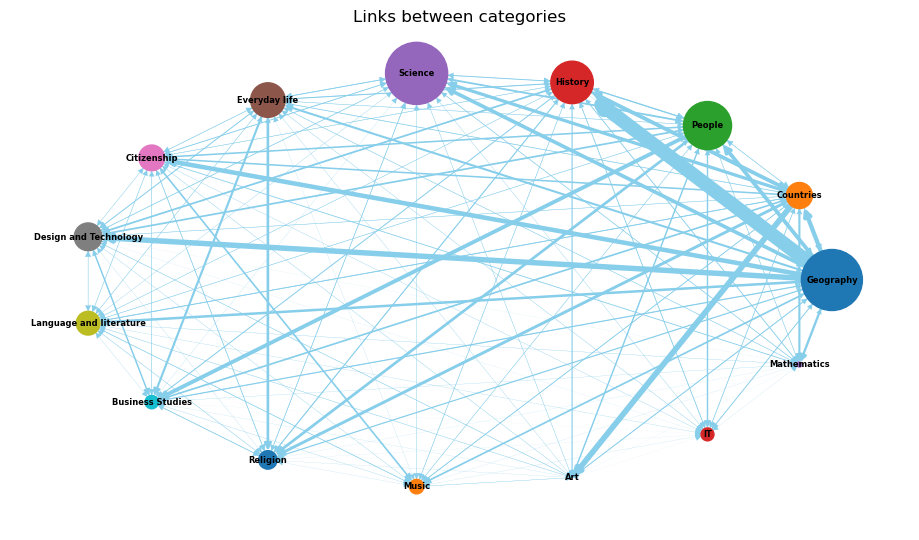

In [29]:
sum_links_data = get_grouped_category_data(data, includeGeography=True)
create_sum_graph(data, sum_links_data)

For interpretation: The plots displays the links between categories in the following way:
- The size of the nodes is determined by the number of articles in that category (MinMax-Normalised).
- The size of the edges is determined by the amount of outgoing links from one category to another, with respect to (dived by) the amount of articles there are in the outgoing article (MinMax-Normalised).

The plot shows the following:
- "Geography" has the most outgoing links to other categories with respect to its size. Hence, it indicates that many of the large hubs may coincide in this category. Further investigation is of interest. 

- "Countries" also has a lot of outgoing links to other categories with respect to its size. Not too suprising since atricles that are in "Countries" also belongs to the category "Geography". 

To see the second point more clearly, the plot below displays the same thing but with the edges from "Geogrpahy" removed. The big difference in size between edges between the plots are due to the fact that the edges in the second one have been normalised without the weights of the "Geograhpy" edges.

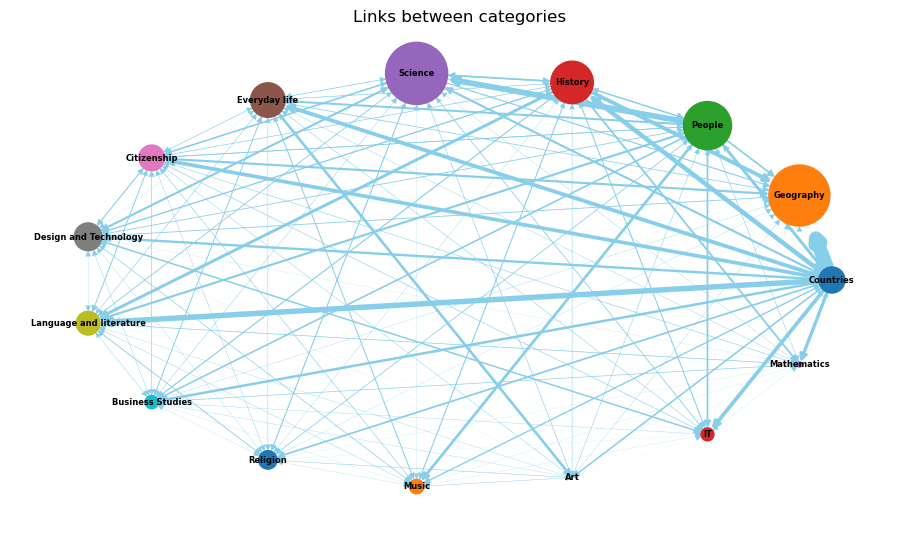

In [30]:
sum_links_data = get_grouped_category_data(data, includeGeography=False)
create_sum_graph(data, sum_links_data)

Apart from showing the second point above more clearly, this plot also shows that there seems to be a lot of links between the categories "Science" and "People" (both ways), with respect to the sizes of these categories. Nothing suprising since scientific discoveries is almost always connected to a certain person/persons.

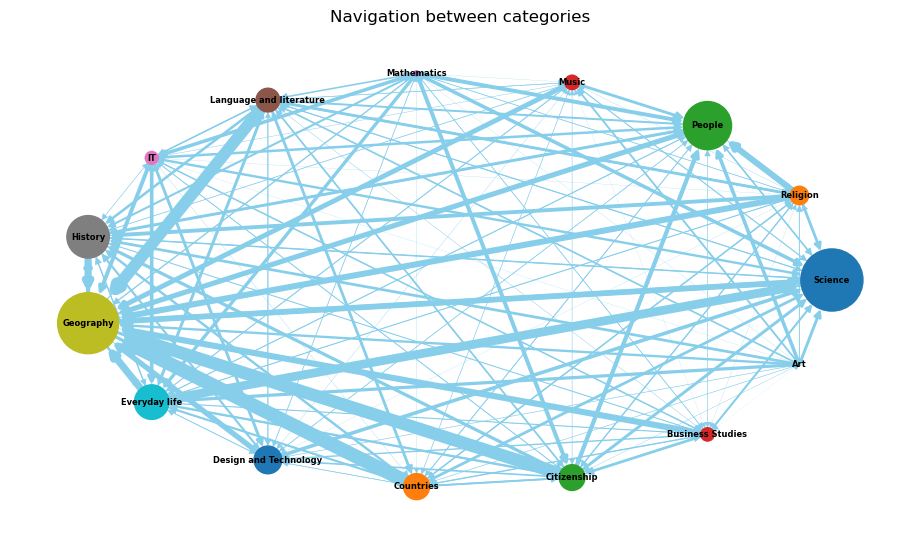

In [31]:
from src.navigation_analysis import *
sum_nav_data = get_category_navigation_matrix(data)
create_sum_graph(data, sum_nav_data, "Navigation between categories")

This plot shows the trans categorical navigation behaviour (i.e. the number of clicks navigating to another category). As could be expected people navigate most between the categories with the most amount of articles in them. It looks like "navigation highways" have been established. Despite a similar amount of articles, users navigate much more via "Geography" than science, which is likely because "Geography" is better connected to other categories as can be seen at the number of links in the previous graph. Further patterns can be analyzed from this, such as that users tend to navigate from "Business Studies" to "Countries" via "Geography" and not direcly despite the number of links.

## Analysis of the shortest paths
Now moving on to analysis of shortest paths. To do this we analysed the shortest paths between the games played in the dataset. This was done in order to save time for the computation and since these are of most interest to us as this can tell us something about the navigation of users and how well they navigate in the game.

To calculate the shortest paths the dijkstra algorithm was used.

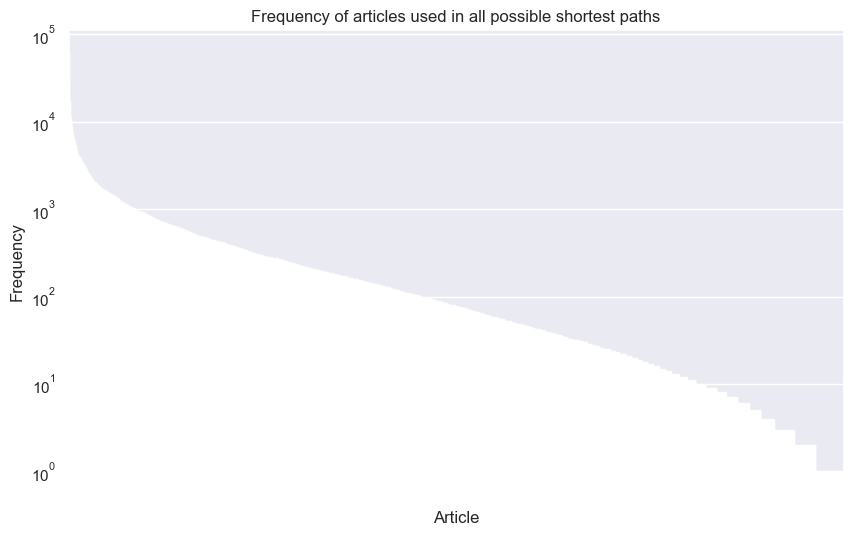

In [39]:
# Calculate shortest_path.csv if not already exists in 
csv_path = calculate_all_shortest_paths(data)

# Calculates article frequency  in all shortest paths
shortest_path_frequency = shortest_path_article_frequency(csv_path)

# Plots the frequency of articles from all shortest paths
plt.figure(figsize=(10,6))
sns.barplot(data=shortest_path_frequency,
            x ='shortest_paths',  
            y='count',
            palette='magma',
            hue='shortest_paths',
            width=1)
plt.yscale('log')
plt.gca().set_xticklabels([])
plt.xlabel("Article")
plt.ylabel("Frequency")
plt.title('Frequency of articles used in all possible shortest paths')
plt.show()

For interpretation:
This barplot displays the total amount of times an article is used in all possible shortest paths between starting and target article in all games (not counting the starting or target article).

From the results it can be seen that some articles are used significantly more often than others (the y-axis is log-scaled). Hence, this indicates that the more frequently used articles could be considered as hubs and that further investigation in this matter is of interest. To get a sense of which articles are more used, see plot below.

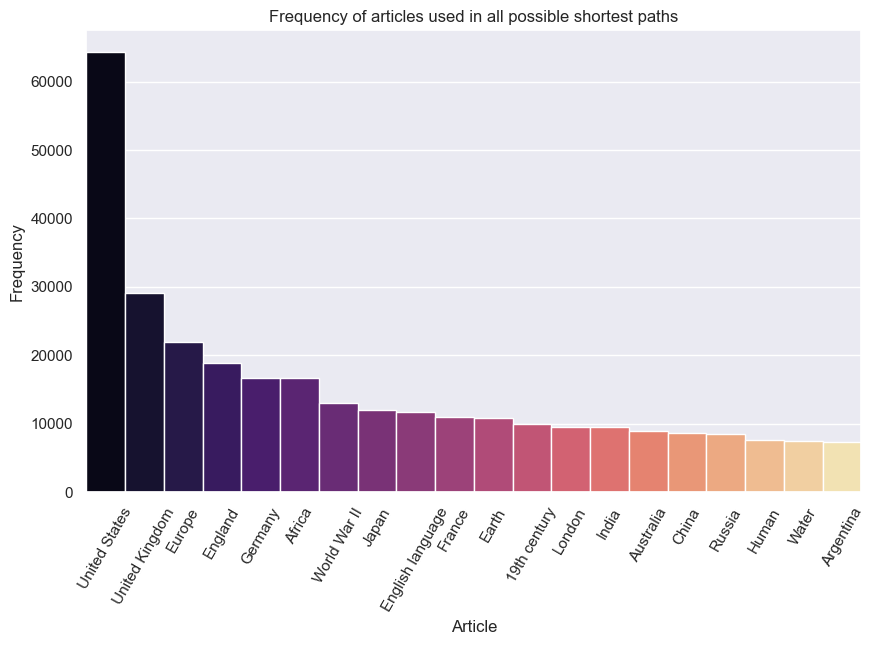

In [38]:
# Plots the frequency of articles from all shortest paths
plt.figure(figsize=(10,6))
sns.barplot(data=shortest_path_frequency.head(20),
            x ='shortest_paths',  
            y='count',
            palette='magma',
            hue='shortest_paths',
            width=1)
plt.xticks(rotation=60)
plt.xlabel("Article")
plt.ylabel("Frequency")
plt.title('Frequency of articles used in all possible shortest paths')
plt.show()

For interpretation: The 20 most used articles from the plot above (y-axis not log-scaled).

From the plot the following things can be seen: 

- "United States" is by far the most used one and hence it can be motivated as the biggest hub in the sense that, on average, going through it will lead you to your target the quickest. 

- The biggest hubs tend to be in the categories "Countries" and "Geography". Indicating that these articles may a have highly varied set of links to other articles. Something that is also shown by the plots under "Analysis of links network".

Notably is that this result is also dependent on what games players have selected to play as we only calculated the shortest path for games people played. This is something we need to analyse further. Do people select to play only certain games? What can this tell us about common knowledge?

# Pagerank vs user frequency

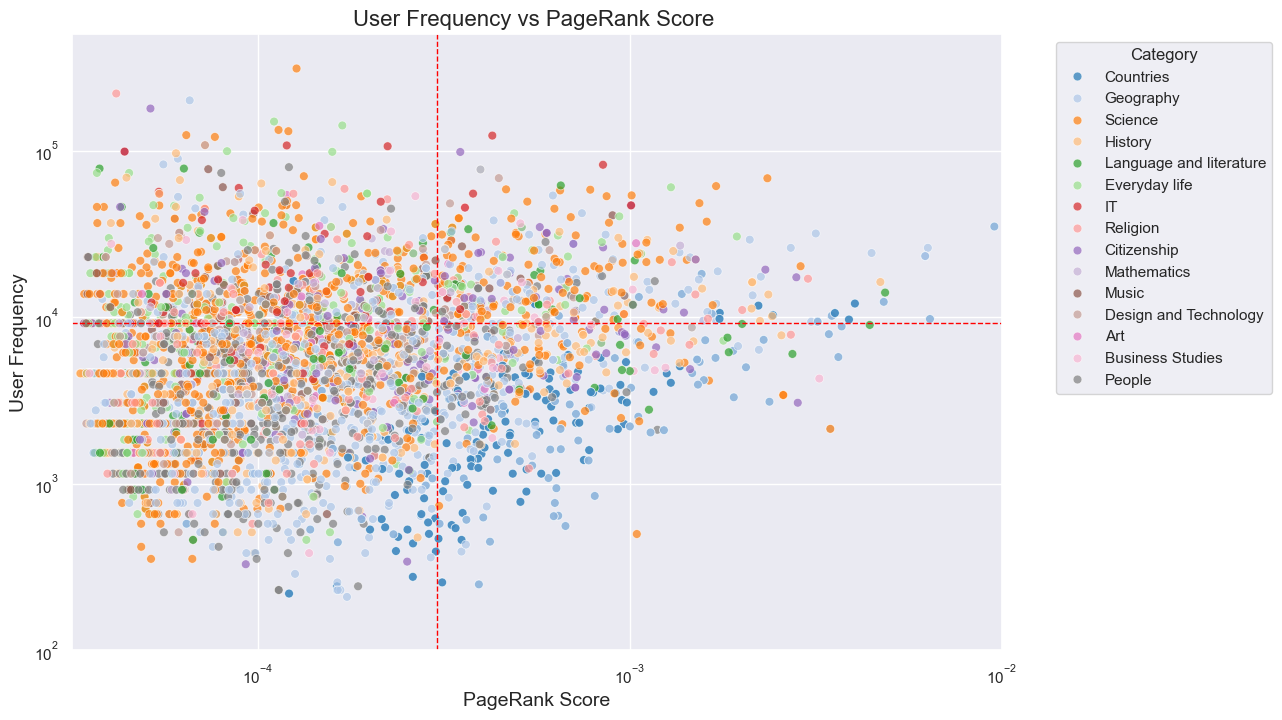

In [62]:
freVpr = get_pageVSfreq_data(data, df_filtered_hubs)
# plot_pageVSfreq(freVpr, category=None) # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category=None)

Due to the fact that most categories are spread out across all quadrants the categories of biggest interest are those that tend to a certain quadrant or have more big outliers than the other ones. The quadrants of interest are the upper left and the lower right quadrant. The first one contains articles that on average is lesser connected yet still highly selected by the players with respect to how often they appear. With the assumption that people in general tend to click more on articles that they know things about, these articles might constitute common knowledge more than other articles. This is because these articles are usually not as effective for reaching the target article but still gets picked. The opposite can be said about the lower right quadrant, which therefore contains articles that might constitute lesser known concepts.

Observations

- Geography is a scattered category that constitutes a large part of the biggest hubs and most frequently used articles by users. However, they also constitute the majority of the more connected articles that does not get used. More specifically, it seems like it is primarily contries that belong to this group, which differs from geography in the sense that the category is very shifted towards the lower right quadrant. Something that is investigated in the next plot. 
- Science is also very scatterd, with a lot of big outliers in both the upper left and lower right quadrants. 
- Everyday life and IT seems to have some articles that are used more than average by users, yet still on average is less connected than other articles. IT is particularly interesting since its articles are heavily shifted up to the left, with 0 articles in the lower right quadrant.

These Categories (except IT due to small amount of data) will therefore be studied further in the upcoming plots by looking for trends on the articles second category. 

(Important not to get hooked on specific outliers since some players also have a good understaning of specific articles that are good for the game)

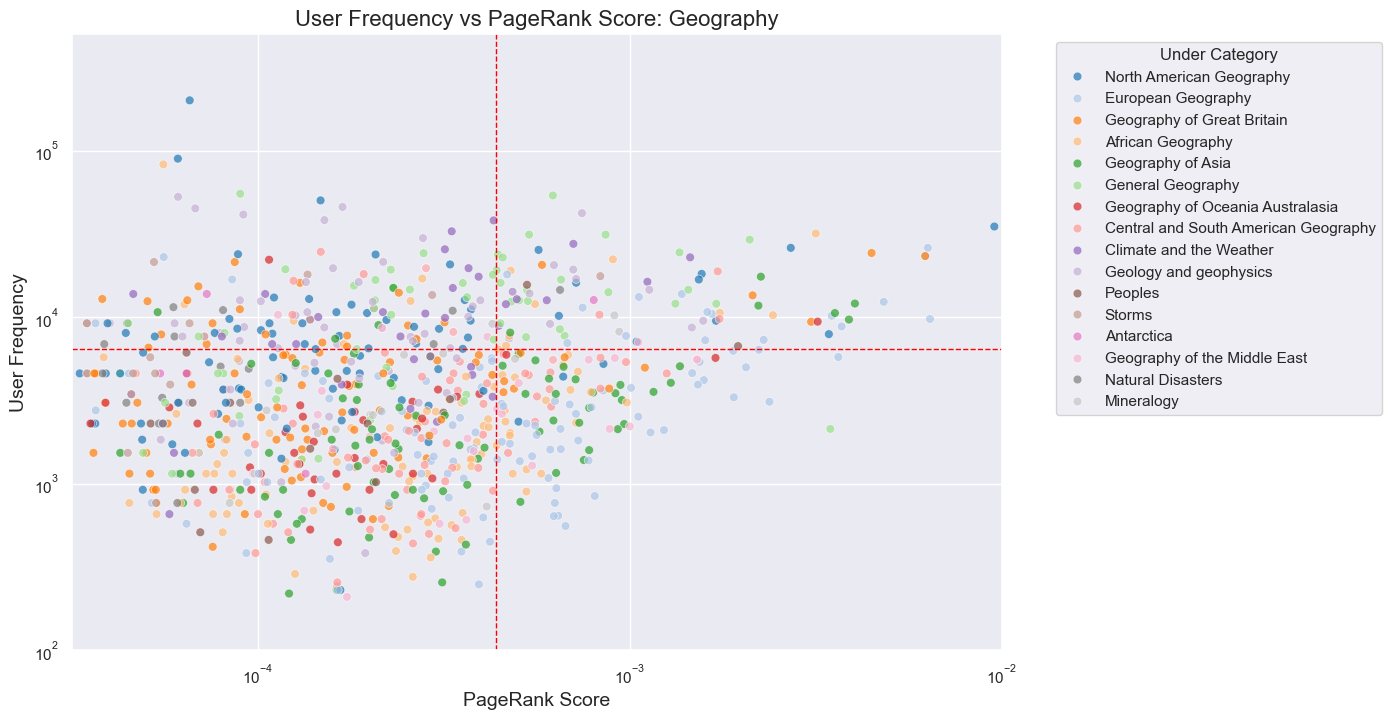

In [63]:
# plot_pageVSfreq(freVpr, category='Geography') # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category='Geography')

Observations
- The categories that tends towards the upper left quadrant with a bigger portion of outliers than other articles are North American Geography, General Geograhpy and Geology and Geophysics. 
- As stated before and can be seen in the first plot, countries constitute the absolute majority of all articles in the lower right quadrant, it can be seen that the countries that one would usually classify as more "known" have a higher frequency by the players. 

The fact that North American Geography tends to the upper left quadrant supports (but does not prove) the claim about the quadrants to some extent, since it can be assumed that people in general have a somewhat good understanding of America and United States compared to other parts of the world, for example countries like Latvia, Laos and Lebanon that can be found in the bottom right quadrant. 

It should however be mentioned that 2 of the biggest outliers in the upper left quadrant have "United States" in the article name, the reason for this is probably that the players only selects this article in order to get to the article "United States", these articles should therefore not be taken into account when drawing conclusions.

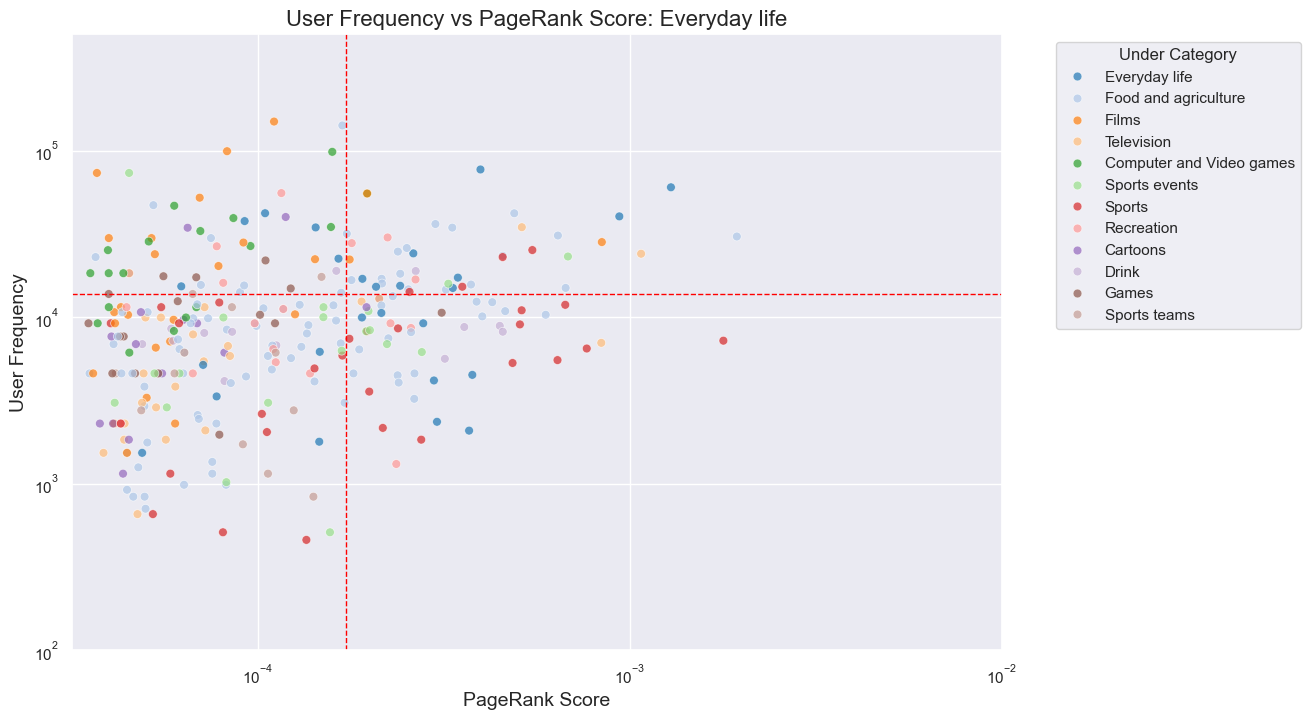

In [64]:
# plot_pageVSfreq(freVpr, category='Everyday life') # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category='Everyday life')

Observation
- The majority of articles with a smaller pagerank score that yet have above average frequency by users belong to the "Film" and "Computer and Video games" categories. Where the articles in question are big popcultural phenomenon such as Star Wars, Nintendo and Mario.
- Sports constitutes the biggest part of the articles in "Everyday life" that are in the lower right quadrant. 

The fact that the articles in the upper left quadrant largely consist of big popcultural phenomenons is yet again an observation that supports the claim that the categories in the upper left quadrants could constitue common knowledge more than the ones in the bottom right one, since these can safely be assumed to be well known all around the world. 

Yet again one big outlier in the upper left quadrant contains "United States" in the article name, diminishing its relevancy for the analysis since players clicking it are probably only doing so to get to "United States", hence it does not support any claims about common knowledge.

The large presence of sports in the lower right quadrant is a bit suprising, even though many of the articles in the the upper left one can safely be assumed to constitue common knowledge more than sports like Volleyball, Badminton and Ice Hockey. But other articles, such as Football, seems to be out of place. It should however be said that there is a lack of big outliers in the lower right quadrant and that no big conclusion should therefore be drawn from it. 

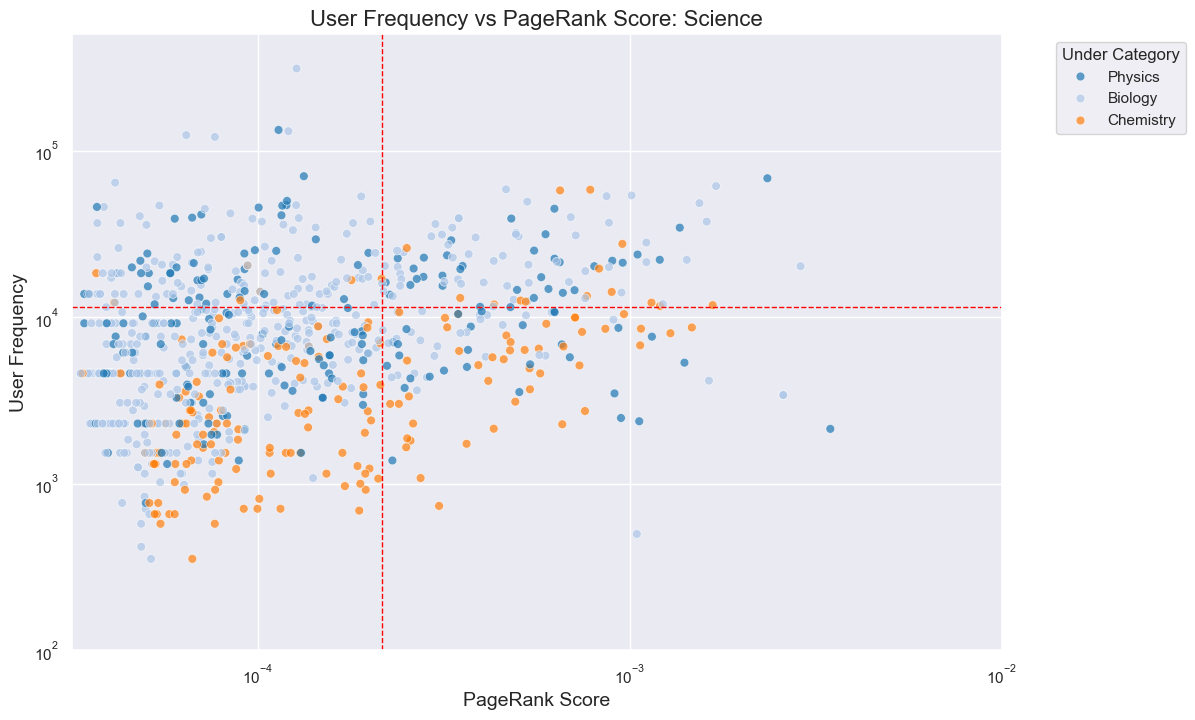

In [65]:
# plot_pageVSfreq(freVpr, category='Science') # Interactive plot, obsevations where made on this
plot_pageVSfreq_static(freVpr, category='Science')

Observations: 
- Chemistry has almost no articles in the upper left quadrant but a lot in the lower right one.
- Physics is heavily scattered. The artiles in the upper left quadrant are almost all space related, while the ones in the lower right quadrant are more low-level physics.
- Biology is also scattered, where animals mostly make up the articles in the upper left quadrant while more low level articles constitute the articles in the lower right column. 

Again this plots shows trends that are expected, everyday things such as animals or well known space operations such as the Moon Landing tends towards the upper left quadrant while articles more in the world of academia tends towards the lower right quadrant. This is to be expected and hence the claim about the relation between the quadrants and there connection to common knowledge is supported. 

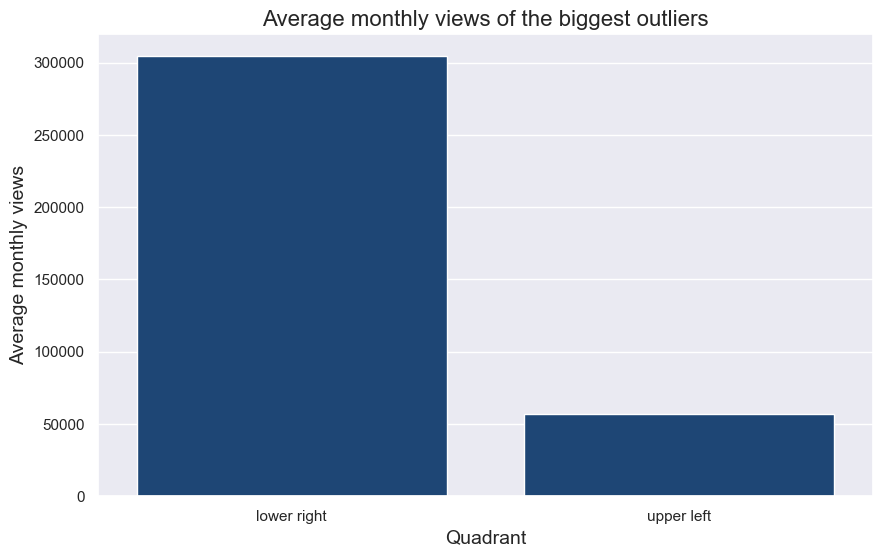

Spearman correlation between amount of views and user frequency:  0.07146499661979555
Spearman correlation between amount of views and pagerank score:  0.5653487198342274


In [71]:
get_quadrant_views(freVpr)

In this plot we gathered external data on the average amount of views on wikipedia per month over the last 1o years for all articles. This was then used to calculate the average views of the biggest outliers in the quadrants. 

There seems to be a strong correlation between which quadrant an outlier is placed in and how often the corresponding article is viewed on wikipedia. However, the results are on first glance a bit counter intuitive, since the a normal assumption would be that articles that constitutes common knowledge more would have a higher rate of visits. The biggest counter argument for this assumption is the fact that the amount of visits an article gets can be seen to be much more correlated to the pagerank score than it is to the user frequency. Since we saw in earlier analysis that the pagerank was correlated to the amount of outgoing links we can therefore say that it is also correlated to the size of the article. Lastly, a larger article does not indicate that the corresponding area is more well known by the general public. Hence, the data on the total amount of monthly visits is not a good represention of what constitutes common knowledge and should therefore not be used as a sanity check for our analysis. 

In [47]:
matrix1, matrix2, unused_links, article_names = load_fork_matrix(data, df_hubs)

Total choices made: 254338
Choices with higher PageRank alternatives: 147831
Percentage: 58.12%


/Users/lisavind/GitHub/ada-2024-project-adaventure/src/fork.py:102: RuntimeWarning: invalid value encountered in divide
  column_sums = np.where(column_sums_unused > 10, column_sums_forgone / column_sums_unused, np.nan)


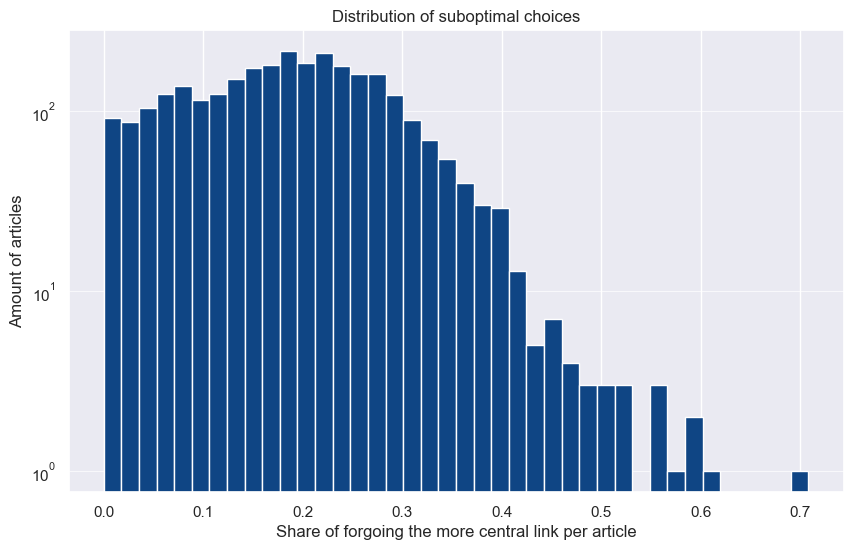

The articles that are forgone the most are:
                                    Article  Forgone Value  Column Sums UL
433                                    Bran       0.708333            24.0
2601                          Thomas Edison       0.619048           126.0
1870                           Nikola Tesla       0.595156           289.0
1609                           Lyme disease       0.588889            90.0
196                                Aquarium       0.573248           628.0
2325                          Schizophrenia       0.564286           280.0
1251                     History of science       0.562212           217.0
37                              90377 Sedna       0.550000            20.0
1711                             Meningitis       0.527027            74.0
2037                     Philosophy of mind       0.522124           113.0
1724              Metric expansion of space       0.515152            33.0
966                        Fertile Crescent       0.5126

In [48]:
df_hubscopy, forgone_articles_df = plot_badChoices(matrix1 + matrix2, unused_links, article_names, df_hubs, data)

This plot illustrates how often users bypass a more central article in favor of a less optimal one, focusing only on cases where alternative articles have the same or shorter shortest-path distance to the target. As expected, users frequently deviate from the optimal navigation path. Notably, some articles are overlooked more frequently than others, suggesting that users are less likely to consider these articles during navigation. Specifically, articles such as "Bran," "Thomas Edison," and "Lyme Disease" appear to be consistently neglected, potentially indicating a lower level of awareness or recognition of these topics among players.

In [49]:
plot_hubScoreVSforgone(df_hubscopy)


In this approach it can be seen that, the more central an article is the more predictable is the rate at which it is ignored despite leading to the target quicker/ equally quickly and with a higher hub score. This may very well be due to a higher occurance rate of 'hublike' articles. Nevertheless, while exploring the plot some peculiarities occur. Some oddly specific articles are ignored less than the majority. This could result from the general public being more aware of e. g. chemical elements, than 'Lyme disease'. For the article 'Lyme disease' is ignored 59% of the time, which is almost double compared to the article 'Rodium', despite a comparable hub score.

In [50]:
finished_hub_positions, unfinished_hub_positions, shortest_hub_positions = get_hub_positions(data, df_hubs)

4604 hubs found 414


/Users/lisavind/GitHub/ada-2024-project-adaventure/src/hubs_frequency.py:47: RuntimeWarning:

invalid value encountered in divide

/Users/lisavind/GitHub/ada-2024-project-adaventure/src/hubs_frequency.py:48: RuntimeWarning:

invalid value encountered in divide

/Users/lisavind/GitHub/ada-2024-project-adaventure/src/hubs_frequency.py:49: RuntimeWarning:

invalid value encountered in divide



nan


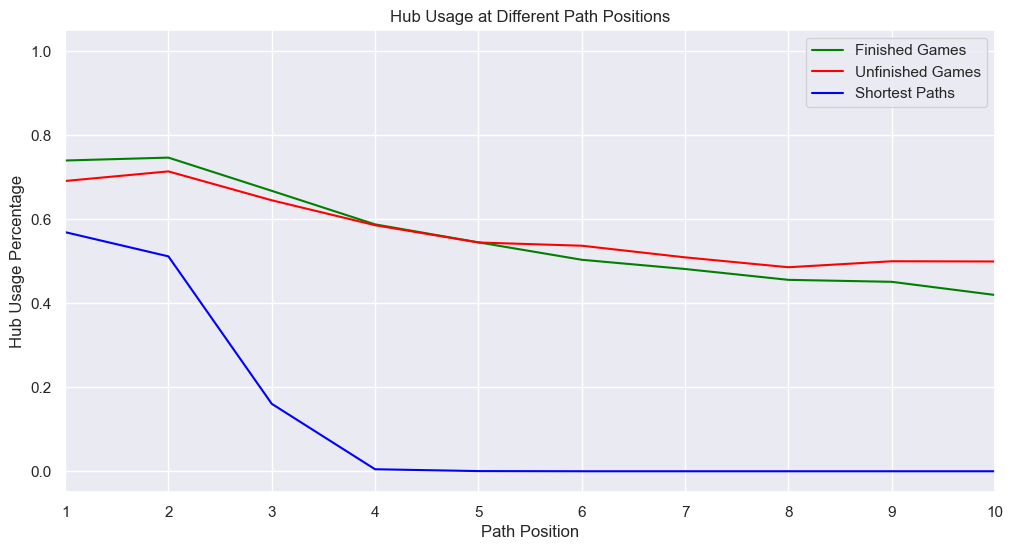

In [51]:
plot_hub_positions(df_hubs, finished_hub_positions, unfinished_hub_positions, shortest_hub_positions)

This plot reveals that in 50% of puzzles, the optimal strategy is to navigate to one of the top 10% most connected hubs with the first click. Most players tend to use these top hubs in their initial steps. Notably, successful players are more likely to utilize hubs within their first three steps compared to unsuccessful players, suggesting that early use of hubs improves navigation success.